Loan Default Prediction Problem Minor Project

In [1]:
#Importing the libraries

import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
datafiles = pd.read_csv('/content/Default_Fin.csv')

In [3]:
 
# 1. Number of people who will be given a grace period of exactly 15 days.

count=len(datafiles[(datafiles["Defaulted?"]==1) & (datafiles["Annual Salary"]>100000) & (datafiles["Bank Balance"]>5000) & (datafiles["Employed"]!=0)])
print(count)

206


In [4]:
# 2. Maximum fine levied by the bank in the period of 15 days

mxp=datafiles["Bank Balance"][(datafiles["Defaulted?"]==1) & (datafiles["Annual Salary"]>100000) & (datafiles["Bank Balance"]>5000)].max()
fine=(2.5*mxp*15)/100
print(fine)


11944.44


In [5]:
# 3. Assuming that all the defaulters haven't paid the EMI get grace, total amount of fine generated by the bank

sum=0
for i in datafiles.Index:
 if datafiles.loc[i-1,'Defaulted?']==0:
   sum+=(2.5*datafiles.loc[i-1,'Bank Balance']*15)/100
print(round(sum,4))
 

34972758.9


In [6]:
#column for whether the Grace Period is given or not
datafiles['Grace?']=((datafiles['Defaulted?']==1) & (datafiles['Bank Balance']>5000) & (datafiles["Annual Salary"]>100000)).astype(int)

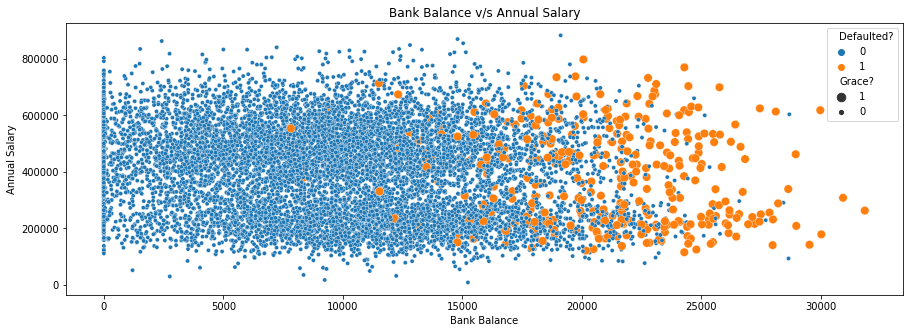

In [7]:
# 4. Plot a graph to show the difference between the bank balance of people eligible for grace period and the people who aren't

plt.figure(figsize=(15,5))
sns.scatterplot(data=datafiles, x='Bank Balance', y='Annual Salary', hue='Defaulted?', hue_order=[0,1], size='Grace?', size_order=[1,0])
plt.title('Bank Balance v/s Annual Salary')
plt.show()

- The people who are defaulted ie orange dots, have bank balance>5000
- The ones eligible for grace period are shown with the orange dots
- Small orange dots are the count of people who are defaulted and are not eligible for grace period=0
- Blue dots represent people who are no defaulted.
- Large orange dots people who are defaulted are eligible for a grace period.

In [8]:
from collections import deque
# 5. Difference in the median of the Bank Balance of people who are eligible for Grace Period and people who aren't

Tmedian=datafiles["Bank Balance"].median()
Gmedian=datafiles["Bank Balance"][(datafiles["Annual Salary"]>100000) & (datafiles["Bank Balance"]>5000)].median()
difference=Gmedian-Tmedian
print(round(difference,4))


1614.42


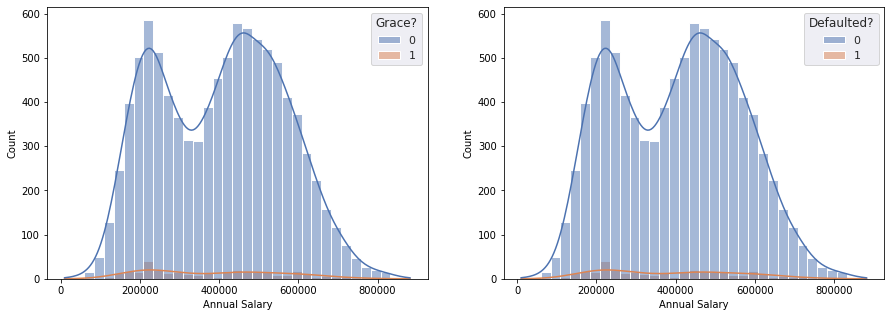

In [9]:
# 6 Graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.set()
sns.histplot(data=datafiles, x="Annual Salary", kde = True, hue = "Grace?", ax=axes[0])
sns.histplot(data=datafiles, x="Annual Salary", kde = True, hue = "Defaulted?", ax=axes[1])


- Since both the figures are exactly the same therefore, all the people who are defaulted are eligible for grace period as well (orange line).
- The graph shows the value=0 for the interval where Annual Balance <10000
- People who are eligible for grace period ie orange line are widespread across the whole graph, it shows that people with all kind of annual balance are defaulted and are eligible for grace period.
- The count of people not defaulted and thus not eligible for grace period ie blue line is far more as compared to those who are defaulted and eligible for grace period ie orange line.